# Exploratory Analysis on Netflix Movies & TV Shows

Netflix is a subscription-based streaming service that allows their members to watch TV shows and movies on an internet-connected device.In this project I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

In this project, I have selected dataset from kaggle to explore and analyze the Covid-19 data in different states of India. We'll use the the python libraries numpy, pandas, matplotlib, seaborn, to do exploratory data analysis on the weather dataset.

## Importing important libraries

In this project, we'll use data analysis tools like Numpy, Pandas and visulization tools like matplotlib, seaborn.
let's install the required libraries and import them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

The special command %matplotlib inline to ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows. We are also using ploty.express for interactive visualizations.

## Downloading a dataset from an online source

You can find the raw data here : https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI.
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL.
* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

Let's load the CSV files using the Pandas library. We'll use the name india_df and state_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shivamb/netflix-shows')

Skipping, found downloaded files in ".\netflix-shows" (use force=True to force download)


The datasets are downloaded into the directory 'Covid19-in-India'. Let's verify this and retrieve the list of files in the datasets.

The os module in Python provides many functions for interacting with the OS and the filesystem. Let's import it and use.

In [3]:
import os
os.listdir('netflix-shows')

['netflix_titles.csv']

In [4]:
nf_df = pd.read_csv('netflix-shows/netflix_titles.csv')
nf_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Here's what we can tell by looking at the dataframe :

* The file provides data of both movies and TV shows.
* Contains 8807 Rows and 12 columns.
* There are some NaN values which we need to handle before our analysis.

## Data Preparation and Cleaning

We can view some basic information about the data frame using the .info method.

In [5]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 8807 entries and 12 columns in the dataset. There are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

In [6]:
nf_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

The nunique() method returns the number of unique values for each column.

## Handling Null Values

We can see that for each of the columns, there are different unique values for some of them. It is obvious that show_id is a unique value for different movie/show similarly, Title, director, cast, country, date_added, listed_in, etc contain many unique values as it is obivious that many movies/shows are directed by the same director.

In [7]:
nf_df.isnull().sum().sum()

4307

In [8]:
nf_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In the entire dataset there are only 4307 null values in which 2634 are missing in 'director' column, 825 in 'cast' column, 831 in 'country' column, 10 in 'date_added' column, 4 in 'rating' and 3 in 'duration' column.

In [9]:
nf_df['director'].fillna('No Director', inplace=True)
nf_df['cast'].fillna('No Cast', inplace=True)
nf_df['country'].fillna('Country Unavailable', inplace=True)
nf_df.dropna(subset=['date_added','rating','duration'],inplace=True)

In [10]:
nf_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

By directly deleting the rows with the missing data is not beneficial to our analysis as we will loss some information.The null values of columns 'director', 'cast' and 'country' is replaced by strings "No Director", "No Cast" and "Country Unavailable" respectively. The other columns 'date_added', 'rating' and 'duration'have less NaN values so we will drop them from the dataset. After, we can see that there are no more null values in the dataset.

## Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code.

In [11]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/da-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/da-project


'https://jovian.ai/sayedebad-777/da-project'

## Splitting the Dataset

As the duration of movies adn TV shows are in minutes and seasons respectively, tt will be easy if we split the dataset diferent for movies and TV shows.

In [12]:
nf_movies_df = nf_df[nf_df['type']=='Movie'].copy()
nf_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [13]:
nf_shows_df = nf_df[nf_df['type']=='TV Show'].copy()
nf_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In the dataset the duration of movie is in minutes and duration of show is in seasons. To make analysis easier, we will convert the values in these columns into integers for both the movies and shows. We will replace the " min" and " seasons" strings with "" and only the integer value (that is the numerical part) will be left.

In [14]:
nf_movies_df.duration = nf_movies_df.duration.str.replace(' min','').astype(int)
nf_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
nf_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
nf_shows_df.seasons = nf_shows_df.seasons.str.replace(' Seasons','').astype(int)

# Exploratory Analysis and Visualization

C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\2431546885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nf_df.groupby(["rating"]).sum().plot(kind='bar',figsize=(10,10))


<AxesSubplot: xlabel='rating'>

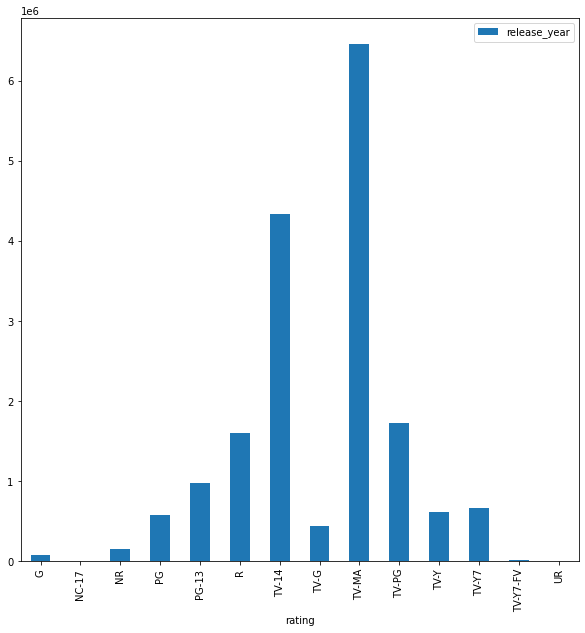

In [15]:
nf_df.groupby(["rating"]).sum().plot(kind='bar',figsize=(10,10))

C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\2847534725.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f1 = nf_movies_df.groupby(["rating"]).sum().plot(kind='bar', ax=ax[0])
C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\2847534725.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f2 = nf_shows_df.groupby(["rating"]).sum().plot(kind='bar', ax=ax[1])
C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\2847534725.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


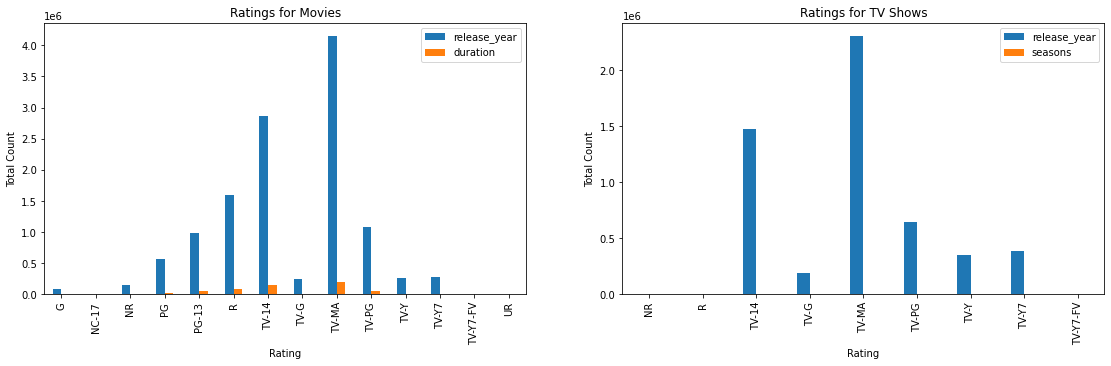

In [16]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = nf_movies_df.groupby(["rating"]).sum().plot(kind='bar', ax=ax[0])
f1.set_title("Ratings for Movies")
f1.set_xlabel("Rating")
f1.set_ylabel("Total Count")
f2 = nf_shows_df.groupby(["rating"]).sum().plot(kind='bar', ax=ax[1])
f2.set_title("Ratings for TV Shows")
f2.set_xlabel("Rating")
f2.set_ylabel("Total Count")
fig.show()

According to the above graphs we can say that for younger users there are more number of TV shows than movies.

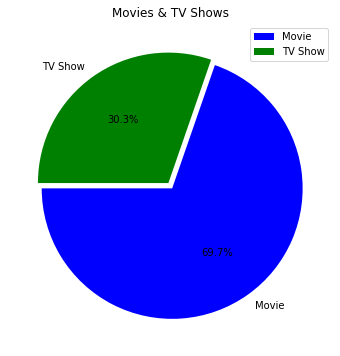

In [17]:
plt.figure(figsize=(6,6))
plt.title("Movies & TV Shows")
g = plt.pie(nf_df.type.value_counts(), explode=(0.025,0.025), labels=nf_df.type.value_counts().index, colors=['blue','green'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

According to the pie chart we can say that approximately 70% of the dataset i.e., approx 6000 are movies and rest are TV shows.

### Content added each year

In [18]:
nf_df['year_added'] = pd.DatetimeIndex(nf_df['date_added']).year
nf_movies_df['year_added'] = pd.DatetimeIndex(nf_movies_df['date_added']).year
nf_shows_df['year_added'] = pd.DatetimeIndex(nf_shows_df['date_added']).year
nf_df['month_added'] = pd.DatetimeIndex(nf_df['date_added']).month
nf_movies_df['month_added'] = pd.DatetimeIndex(nf_movies_df['date_added']).month
nf_shows_df['month_added'] = pd.DatetimeIndex(nf_shows_df['date_added']).month

In [19]:
nf_yr = nf_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
nf_yr = nf_yr[nf_yr.year != 2020]
nf_yr

,year,count
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


nf_yr is the dataframe of years from 2008 to 2019

In [20]:
nf_yr2 = nf_df[['type','year_added']]
movie_yr = nf_yr2[nf_yr2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_yr = movie_yr[movie_yr.year != 2020]
show_yr = nf_yr2[nf_yr2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_yr = show_yr[show_yr.year != 2020]

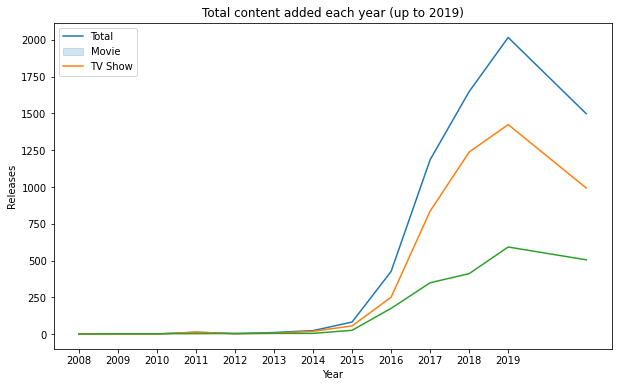

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=nf_yr, x='year', y='count')
sns.lineplot(data=movie_yr, x='year', y='count')
sns.lineplot(data=show_yr, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

The hype to Netflix raised after 2014, where more number of users started using this platform. Therefore from 2014 amount of content added/released is increased. From 2019 onwards it started decreasing maybe due to Covid-19 shooting of some movies and TV shows that are supposed to be released on 2019-2020 were kept on hold.

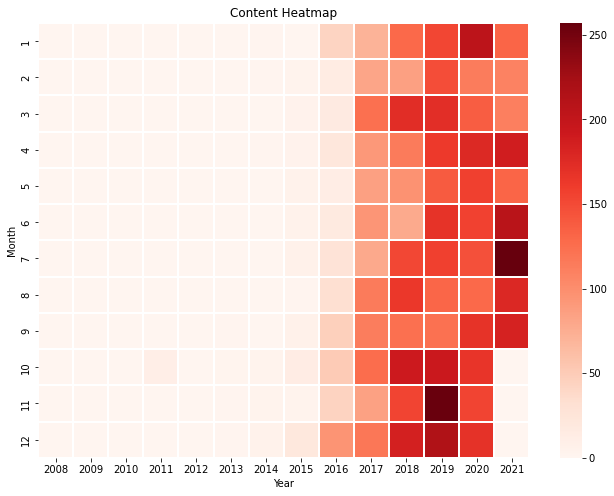

In [22]:
month_yr_df = nf_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_yr_df, linewidths=0.025, cmap="Reds")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

The above heatmap depict the same trend of popularity of Netflix.

### Movie Duration

C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\399506982.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(nf_movies_df.duration, color='skyblue',ax=ax[0]);
C:\Users\sayed\AppData\Local\Temp\ipykernel_21400\399506982.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(nf_shows_df.

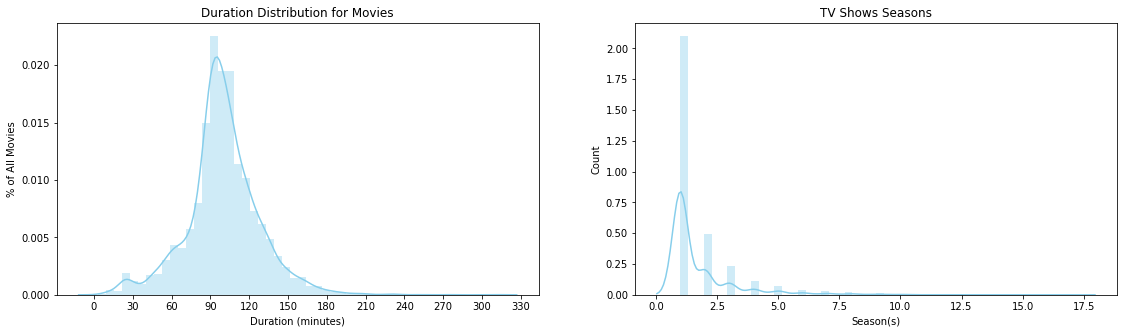

In [23]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(nf_movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Movies")
g1.set_ylabel("% of All Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.distplot(nf_shows_df.seasons, color='skyblue',ax=ax[1]);
g2.set_title("TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

We can see that the duration for movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes. TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

### Countries with the most content available

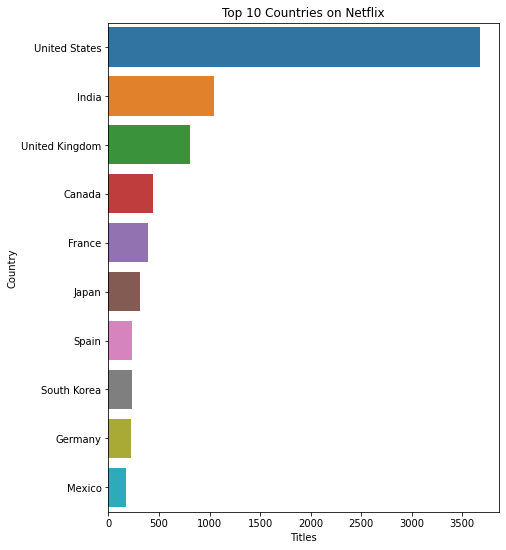

In [24]:
filtered_countries = nf_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

The United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it is the most populated country.

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/da-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/da-project


'https://jovian.ai/sayedebad-777/da-project'

# Asking and Answering Questions

### Q1 : Which are the top 10 genres on Netflix?

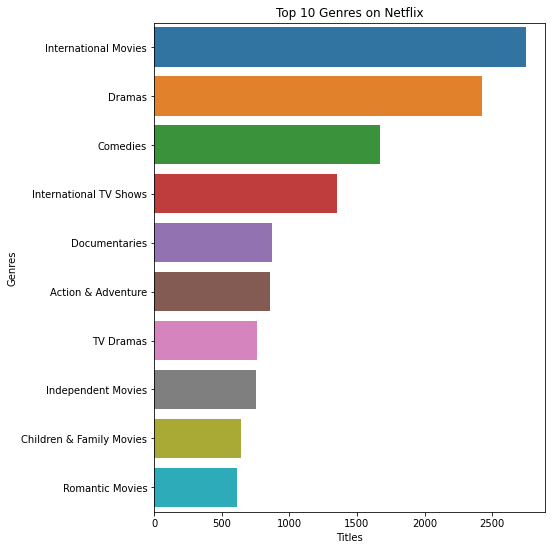

In [26]:
filtered_genres = nf_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Almost every user on netflix enjoys watching International movies. The reason for this could be that majority of viewers are actually international subscribers.

### Q2 : Who are the top 10 directors on Netflix with the most releases?

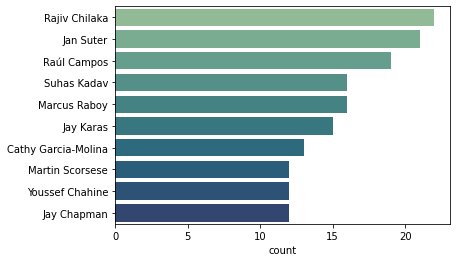

In [27]:
filtered_directors = nf_df[nf_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='crest')
plt.show()

As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

### Q3 : Who are the top 10 actors on Netflix based on number of titles?

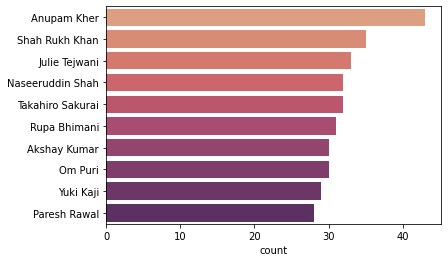

In [28]:
filtered_cast = nf_df[nf_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='flare')
plt.show()

In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. This reinforces the sentiment that the majority of Netflix subscribers are international.

### Q4 : Top 10 movies with PG rating?

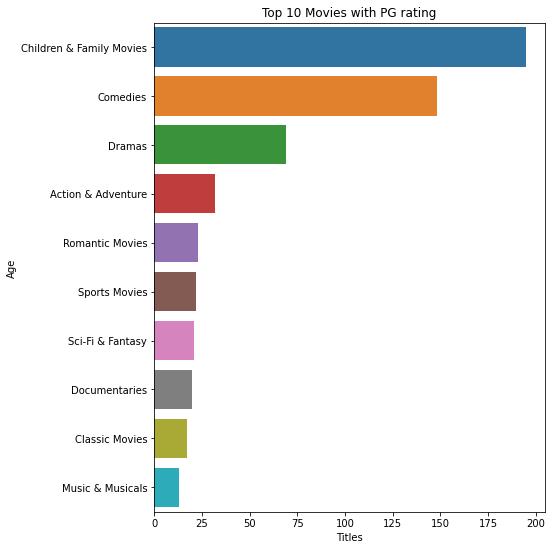

In [29]:
filtered_age = nf_df[nf_df['rating']=='PG'].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_age, order=filtered_age.value_counts().index[:10])
plt.title('Top 10 Movies with PG rating')
plt.xlabel('Titles')
plt.ylabel('Age')
plt.show()

# Inferences and Conclusion
Netflix has grown over the years it is very much popular in youth. The success of Netflix is because it provides ad-free and original content and to make this platform international therefore a good amount of international movies and TV shows were added over the years, also it has variety of content for almost all type of age groups.

# Future Work
* IMDB Ratings on Netflix.
* Model which can tell which movie is best for a particular genre.
* Graphs can be more beautiful and attractive.

# References
* https://www.kaggle.com/shivamb/netflix-shows
* https://jovian.ai/allenkong221/netflix-movies-and-tv-shows-project#C24

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/da-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/da-project


'https://jovian.ai/sayedebad-777/da-project'